In [1]:
#Import the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.patches import Rectangle
import seaborn as sb
%matplotlib inline

#set diagram parameters
base_color = sb.color_palette()[0]
style.use('seaborn')

### Getting to Know Boston's Data

In [2]:
# Read in the Boston Data
df_bos = pd.read_csv('./listings_boston.csv')
df_bos.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,19,2021-02-26,0.27,1,106
1,6695,$99 Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,169,29,115,2019-11-02,0.81,4,40
2,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,NaN,Back Bay,42.35061,-71.08787,Entire home/apt,96,29,5,2020-12-02,0.08,11,307
3,10986,North End (Waterfront area) CLOSE TO MGH & SU...,38997,Michelle,NaN,North End,42.36377,-71.05206,Entire home/apt,96,29,2,2016-05-23,0.03,11,293
4,13247,Back Bay studio apartment,51637,Susan,NaN,Back Bay,42.35164,-71.08752,Entire home/apt,75,91,0,NaN,NaN,2,0


In [3]:
df_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3146 non-null   int64  
 1   name                            3146 non-null   object 
 2   host_id                         3146 non-null   int64  
 3   host_name                       3068 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   3146 non-null   object 
 6   latitude                        3146 non-null   float64
 7   longitude                       3146 non-null   float64
 8   room_type                       3146 non-null   object 
 9   price                           3146 non-null   int64  
 10  minimum_nights                  3146 non-null   int64  
 11  number_of_reviews               3146 non-null   int64  
 12  last_review                     21

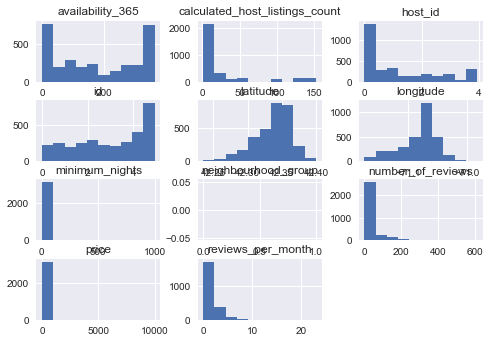

In [4]:
df_bos.hist();

#### Business Questions
the variable data shows that there are skewed distributions for number of reviews, reviews per month and price which would be interesting to investigate.

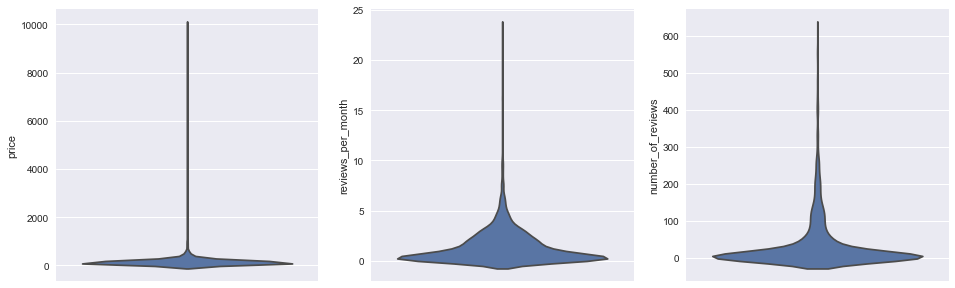

In [5]:
# Closer look at 'price', 'reviews_per_month' and 'number_of_reviews'
plt.figure(figsize = [16, 5])

plt.subplot(1, 3, 1)
sb.violinplot(data =df_bos, y = 'price', inner = None);

plt.subplot(1, 3, 2)
sb.violinplot(data =df_bos, y = 'reviews_per_month', inner = None);

plt.subplot(1, 3, 3)
sb.violinplot(data =df_bos, y = 'number_of_reviews', inner = None);

In [6]:
# investigate nulls for reviews per month
df_null_bos = df_bos[df_bos['reviews_per_month'].isnull()]
df_null_bos.number_of_reviews.describe()

count    982.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: number_of_reviews, dtype: float64

#### Data Cleaning and Quality Issues
* 'reviews_per_month' and 'last_review' contain nulls. Investigation shows that this is because there have been no reviews. Replace null with 0 in 'reviews_per_month', filter out nulls in 'last review' if necessary (This data is not needed to answer the Business Questions).
* 'host_name' contains nulls. Replace null with "Not given" in 'host_name'.
* 'neigbourhood_group' is completely empty. Based on the analysis in `neighbourhoods.ipynb`, the column neighbourhood_group in the Boston data will not be used, with neighbourhood analysis referring to the column neighbourhood.
* The violin plots show signs of outliers for 'price', 'reviews_per_month' and 'number_of_reviews' that could distort the analysis, so will be filtered appropriately

In [7]:
# replace nulls with 0 in 'reviews_per_month'
df_bos['reviews_per_month'].fillna(0, inplace=True)

# replace nulls with 'Not given' in 'host_name'
df_bos['host_name'].fillna(0, inplace=True)

# drop column 'neighbourhood_group'
df_bos.drop(['neighbourhood_group'], axis=1, inplace=True)

In [8]:
# filter out outliers for 'price', 'reviews_per_month' and 'number_of_reviews':
df_bos = df_bos[(df_bos['price']< 2000)]
df_bos = df_bos[(df_bos['reviews_per_month']< 10)]
df_bos = df_bos[(df_bos['number_of_reviews']< 400)]

#### Create id integer values for category columns to facilitate co-relation analysis later
* neighbourhood
* room_type

In [9]:
# create a daframe that assigns a number to the room type
df_bos_room = pd.DataFrame({"room_type": list(df_bos.room_type.unique())}, dtype="category")
df_bos_room['room_type_id'] = list(range(len(df_bos_room.index)))
df_bos_room.head()

,room_type,room_type_id
0,Entire home/apt,0
1,Private room,1
2,Shared room,2
3,Hotel room,3


In [10]:
# create a daframe that assigns a number to the neighbourhood.
# this is being delibrately ranked on mean price 
# to see if there is a corellation between individual prices and the neighbourhood ,
df_bos_hood = df_bos.groupby(['neighbourhood'])['price'].mean()
df_bos_hood = df_bos_hood.sort_values().reset_index()
df_bos_hood['neighbourhood_id'] = list(range(len(df_bos_hood.index)))
df_bos_hood.rename(columns={'price':'mean_price'}, inplace=True)

df_bos_hood.head()

,neighbourhood,mean_price,neighbourhood_id
0,Mattapan,79.000000,0
1,Hyde Park,80.526316,1
2,Roslindale,87.132075,2
3,Brighton,101.362319,3
4,Roxbury,112.961864,4


In [11]:
df_bos = pd.merge(df_bos, df_bos_room, left_on='room_type', right_on='room_type', how='left')
df_bos = pd.merge(df_bos, df_bos_hood, left_on='neighbourhood', right_on='neighbourhood', how='left')
df_bos.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
room_type_id                        int64
mean_price                        float64
neighbourhood_id                    int64
dtype: object

In [12]:
df_access_bos = pd.read_csv('./boston_access.csv')

In [13]:
# merge transit airport parking columns with main data set
# columns to merge
cols = (['id', 'transit', 'parking', 'airport'])
# merge
df_bos = df_bos.merge(df_access_bos[cols], left_on='id', right_on='id', how='left')
df_bos.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_id,mean_price,neighbourhood_id,transit,parking,airport
0,3781,HARBORSIDE-Walk to subway,4804,Frank,East Boston,42.36413,-71.02991,Entire home/apt,125,32,...,2021-02-26,0.27,1,106,0,140.083333,7,1,0,0
1,6695,$99 Special!! Home Away! Condo,8229,Terry,Roxbury,42.32802,-71.09387,Entire home/apt,169,29,...,2019-11-02,0.81,4,40,0,112.961864,4,0,0,0
2,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,Back Bay,42.35061,-71.08787,Entire home/apt,96,29,...,2020-12-02,0.08,11,307,0,190.180328,16,1,0,0
3,10986,North End (Waterfront area) CLOSE TO MGH & SU...,38997,Michelle,North End,42.36377,-71.05206,Entire home/apt,96,29,...,2016-05-23,0.03,11,293,0,173.902778,13,1,0,0
4,13247,Back Bay studio apartment,51637,Susan,Back Bay,42.35164,-71.08752,Entire home/apt,75,91,...,NaN,0.00,2,0,0,190.180328,16,0,0,0


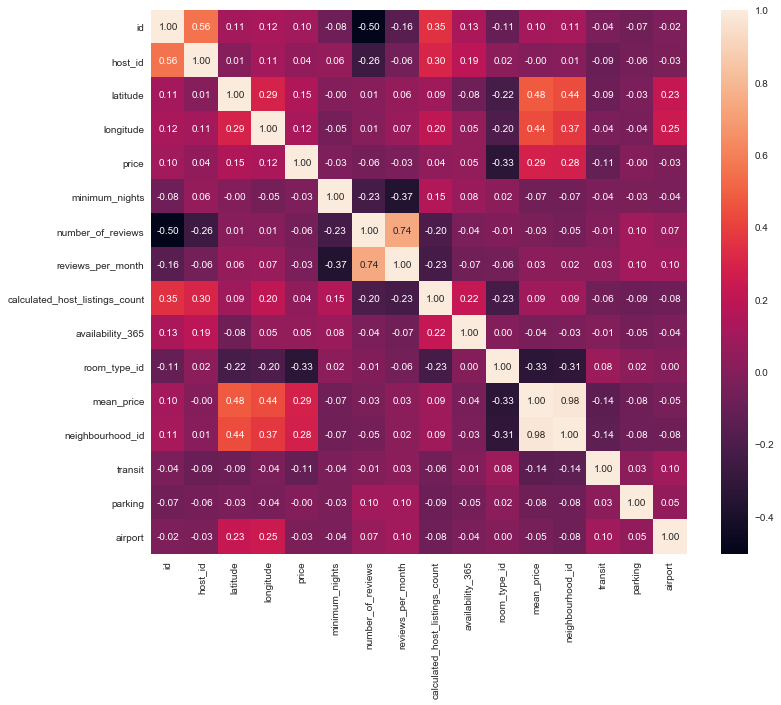

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
sb.heatmap(df_bos.corr(), annot=True, fmt=".2f", ax=ax)
plt.savefig('boston_corr.png')
plt.show();

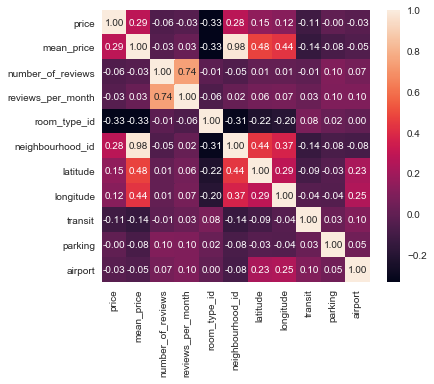

In [15]:
#reduce number of comparisons for report
cols = ['price','mean_price','number_of_reviews','reviews_per_month','room_type_id',
        'neighbourhood_id','latitude','longitude','transit','parking','airport']
fig, ax = plt.subplots(figsize=(6, 5))
sb.heatmap(df_bos[cols].corr(), annot=True, fmt=".2f", ax=ax)
plt.savefig('boston_corr.png')
plt.show();

* At first examination, the corelations between the variables are generally fairly weak, or at least not robust enough to make predictions
* However Latitude and Longitude both corelate moderately with price with indexes of 0.48 and 0.44 respectively.

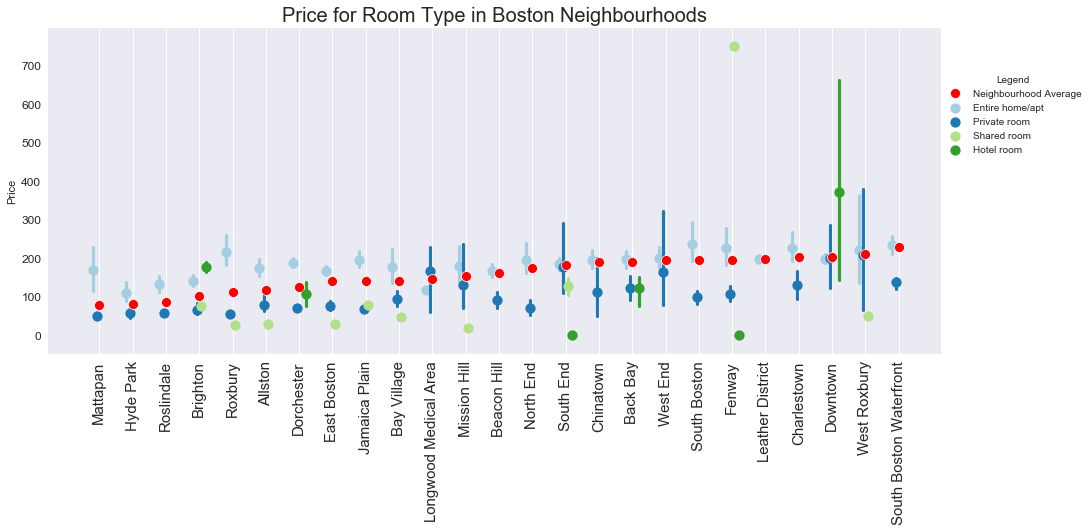

In [16]:
# plot for comapring prices of room types with the mean price for neighbourhoods

fig = plt.figure(figsize = [16,6])
ax = fig.add_subplot(111)
ax = sb.pointplot(data = df_bos, x = 'neighbourhood_id', y = 'price', hue = 'room_type',palette = 'Paired', linestyles = '', dodge =0.4)
ax = sb.lineplot(data = df_bos_hood, x = 'neighbourhood_id', y = 'mean_price', marker="o", ms=10, linewidth = 0, color = 'red', label='Neighbourhood Average')
plt.title('Price for Room Type in Boston Neighbourhoods', size = 20)
plt.xticks(df_bos_hood.neighbourhood_id,df_bos_hood.neighbourhood, rotation=90, size = 15)
plt.yticks(size = 12)
plt.ylabel('Price')
plt.xlabel(None)
plt.grid()

leg = plt.legend(loc=(1,0.6), title="Legend")

plt.savefig('boston_room.png', bbox_inches = 'tight')

plt.show();

For the report
* On the whole Private rooms cost less than Entire homes/appartments, although in some neighbourhoods such as South End, West End, Downtown and West Roxbury they are the same, or in the cas of Longwood Medical Area they even more.
* The ranking of mean price for neighbourhoods follows the ranking of the Entire homes/appartments categories, but because of the four districts where the prices are the same for both categories, together Longwood Medical whose private rooms cost more, this ranking does not hold for private rooms. 

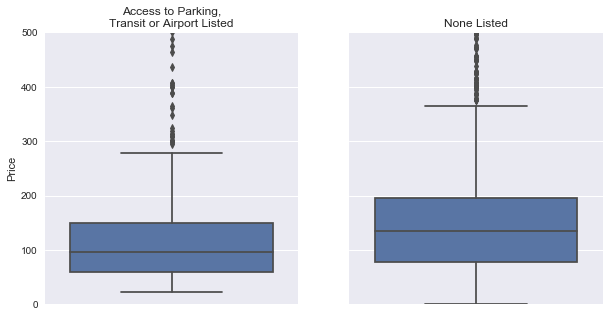

In [17]:
# Comparison of distributions of 'price' for Names mentioning Proximity to Airport, Transit or with Parking...
# ..vs Names not mentioning Proximity to Airport, Transit or with Parking

plt.figure(figsize = [10, 5])

# Boxplot showing distribution for Names mentioning Proximity to Airport, Transit or with Parking
plt.subplot(1, 2, 1)
plt.ylim([0, 500])
plt.title("Access to Parking,\nTransit or Airport Listed")
sb.boxplot(data =df_bos.query("transit == 1 or airport == 1 or parking == 1"), y = 'price').set(ylabel='Price');

# Boxplot showing distribution for Names not mentioning Proximity to Airport, Transit or with Parking
plt.subplot(1, 2, 2)
plt.ylim([0, 500])
plt.title("None Listed")
sb.boxplot(data =df_bos.query("transit == 0 and airport == 0 and parking == 0"), y = 'price').set(yticklabels=[],ylabel=None);

plt.savefig('boston_access_price.png');


In [18]:
df_bos.query("transit == 1 or airport == 1 or parking == 1").price.describe()

count    417.000000
mean     121.019185
std       91.217353
min       22.000000
25%       59.000000
50%       96.000000
75%      150.000000
max      599.000000
Name: price, dtype: float64

In [19]:
df_bos.query("transit == 0 and airport == 0 and parking == 0").price.describe()

count    2695.000000
mean      159.273469
std       140.738799
min         0.000000
25%        77.000000
50%       134.000000
75%       195.000000
max      1995.000000
Name: price, dtype: float64

For the report:
* Median 96 vs 134
* 75% at least 22 vs 77

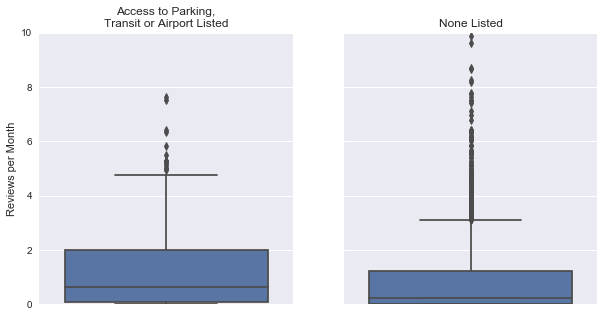

In [20]:
# Comparison of distributions of 'reviews_per_month' for Names mentioning Proximity to Airport, Transit or with Parking...
# ..vs Names not mentioning Proximity to Airport, Transit or with Parking

plt.figure(figsize = [10, 5])

# Boxplot showing distribution for Names mentioning Proximity to Airport, Transit or with Parking
plt.subplot(1, 2, 1)
plt.ylim([0, 10])
plt.title("Access to Parking,\nTransit or Airport Listed")
sb.boxplot(data =df_bos.query("transit == 1 or airport == 1 or parking == 1"), y = 'reviews_per_month').set(ylabel='Reviews per Month');

# Boxplot showing distribution for Names not mentioning Proximity to Airport, Transit or with Parking
plt.subplot(1, 2, 2)
plt.ylim([0, 10])
plt.title("None Listed")
sb.boxplot(data =df_bos.query("transit == 0 and airport == 0 and parking == 0"), y = 'reviews_per_month').set(yticklabels=[],ylabel=None);

plt.savefig('boston_access_revabs.png');

In [21]:
df_bos.query("transit == 1 or airport == 1 or parking == 1").reviews_per_month.describe()

count    417.000000
mean       1.247002
std        1.521150
min        0.000000
25%        0.080000
50%        0.620000
75%        2.000000
max        7.630000
Name: reviews_per_month, dtype: float64

In [22]:
df_bos.query("transit == 0 and airport == 0 and parking == 0").reviews_per_month.describe()

count    2695.000000
mean        0.856549
std         1.304749
min         0.000000
25%         0.000000
50%         0.230000
75%         1.240000
max         9.880000
Name: reviews_per_month, dtype: float64

For the report:
* Median 0.62 vs 0.23
* 75% at least 0.08 vs 0,00

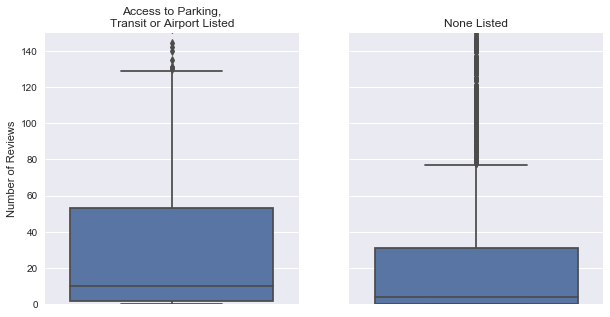

In [23]:
# Comparison of distributions of 'number_of_reviews' for Names mentioning Proximity to Airport, Transit or with Parking...
# ..vs Names not mentioning Proximity to Airport, Transit or with Parking

plt.figure(figsize = [10, 5])

# Boxplot showing distribution for Names mentioning Proximity to Airport, Transit or with Parking
plt.subplot(1, 2, 1)
plt.ylim([0, 150])
plt.title("Access to Parking,\nTransit or Airport Listed")
sb.boxplot(data =df_bos.query("transit == 1 or airport == 1 or parking == 1"), y = 'number_of_reviews').set(ylabel='Number of Reviews');

# Boxplot showing distribution for Names not mentioning Proximity to Airport, Transit or with Parking
plt.subplot(1, 2, 2)
plt.ylim([0, 150])
plt.title("None Listed")
sb.boxplot(data =df_bos.query("transit == 0 and airport == 0 and parking == 0"), y = 'number_of_reviews').set(yticklabels=[],ylabel=None);

plt.savefig('boston_access_revpro.png');

In [24]:
df_bos.query("transit == 1 or airport == 1 or parking == 1").number_of_reviews.describe()

count    417.000000
mean      42.685851
std       64.053761
min        0.000000
25%        2.000000
50%       10.000000
75%       53.000000
max      343.000000
Name: number_of_reviews, dtype: float64

In [25]:
df_bos.query("transit == 0 and airport == 0 and parking == 0").number_of_reviews.describe()

count    2695.000000
mean       31.051206
std        59.197181
min         0.000000
25%         0.000000
50%         4.000000
75%        31.000000
max       397.000000
Name: number_of_reviews, dtype: float64

For the report:
* Median 10 vs 4
* 75% at least 2 vs 0

#### Conclusion
* for Price there is no real difference between the entries that mention these access factors
* Whilst not very many advertise these access factors (417 / 2695 = 15%), a higher percentage of them recieve a higher number of reviews, and a higher number of reviews per month than than without.

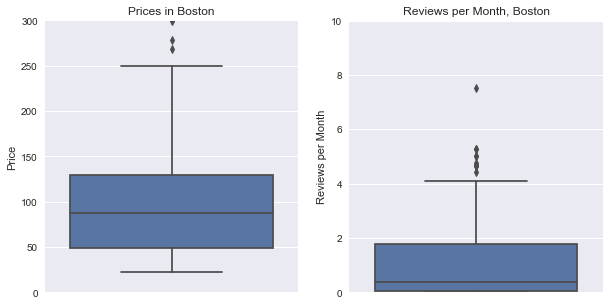

In [26]:
#Boxplots for comparison of Seattle and Boston

plt.subplots(figsize=(10,5))

# Box Plot prices Boston
plt.subplot(1, 2, 1)
plt.ylim([0, 300])
plt.title('Prices in Boston')
sb.boxplot(data =df_bos.query("transit == 1"), y = 'price').set(ylabel='Price');

# Box Plot reviews_per_month Boston* for Price there is no real difference between the entries that mention these access factors
plt.subplot(1, 2, 2)
plt.ylim([0, 10])
plt.title('Reviews per Month, Boston')
sb.boxplot(data =df_bos.query("transit == 1"), y = 'reviews_per_month').set(ylabel='Reviews per Month');

plt.savefig('boston_compare.png');